# MISURAZIONE g

stimiamo il valore di g usando entrambi i periodi trovati

$T = 2\pi\sqrt{\frac{D}{g}} \Rightarrow g = \frac{4\pi^2D}{T^2}$

In [9]:
from numpy import pi as PI
from interpolazione3 import final_val

# perido ottenuto con formula
T,sigmaT = 2.0026, 0.0019

D = 0.994 # distanza dei coltelli del pendolo (m)

def g_T(T,sT): # g(T)
    g = 4* PI**2 * D / T**2 # calcolo g
    sg = g*2*sT/T # calcolo sigma g
    return g,sg

g,sg = g_T(T,sigmaT) # misura di g
print('g: ',final_val(g,sg,decimals=4,udm='ms-2'))

g:  9.7849 ± 0.0186 ms-2


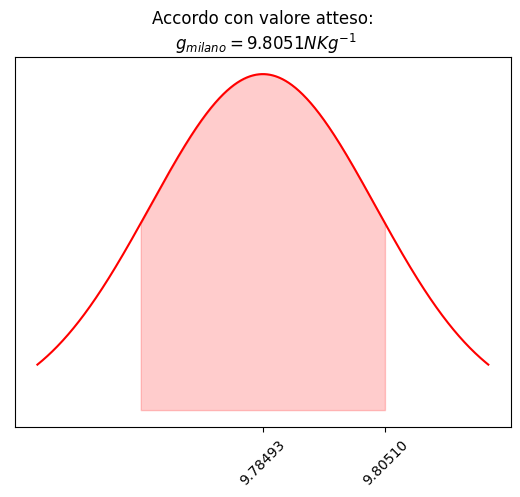

Accordo in percentuale rosso: 27% >> 5%
(distanza in sigma: 1.09)



In [10]:
from interpolazione3 import probability_under_norm
import matplotlib.pyplot as plt
import scipy.stats as sc
import numpy as np

g_milano = 9.8051 # tabulata https://www.handelskammer.bz.it/it/servizi/regolazione-del-mercato/ufficio-metrico/metrologia-legale/titolari-strumenti/strumenti-pesare/zone-di-gravit%C3%A0-e-numero-divisioni

plt.title('Accordo con valore atteso:\n $g_{milano} = 9.8051 N Kg^{-1}$')

x = np.linspace(g-2*sg,g+2*sg,1000)

R = sc.norm.pdf(x,loc=g,scale=sg)
plt.plot(x,R, color='red', label='stima con formula')
t = np.abs(g - g_milano) / sg
plt.fill_between(x= x,y1= R,where= (g - t*sg < x)&(x < g + t*sg),color= "red",alpha= 0.2)

plt.xticks([g,g_milano],rotation=45)
plt.yticks([])
plt.show()

p = (1-probability_under_norm(g,sg,g_milano))*100
print(f'Accordo in percentuale rosso: {int(p)}% >> 5%')
print(f'(distanza in sigma: {np.round(np.abs(g - g_milano) / sg,2)})\n')